##  ML Final Project - Heart Disease Prediction

## Introduction

The Heart disease is one of the leading causes of death globally. Early identification of individuals at risk, particularly for heart attacks, can significantly improve survival rates by enabling timely interventions and preventive care. With the advancements in machine learning, predictive models can analyze health data and accurately predict heart disease risk, helping medical professionals identify and treat high-risk patients more effectively.
As a data scientist collaborating with healthcare organizations, my goal is to reduce the risk of heart attacks by developing models that can predict which individuals are at high risk. By analyzing health indicators such as blood pressure, cholesterol levels, lifestyle habits, and demographics, we can provide earlier interventions and allocate healthcare resources more effectively.


## Data Summary

- HeartDiseaseorAttack: Indicates if the individual has heart disease or has had a heart attack (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HighBP: Indicates if the individual has high blood pressure (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HighChol: Indicates if the individual has high cholesterol (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- CholCheck	Indicates if the individual has had their cholesterol checked (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- BMI: Body Mass Index, a measure of body fat based on height and weight.
  - datatype: Numerical Continuous
- Smoker: Indicates if the individual is a smoker (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Stroke: Indicates if the individual has had a stroke (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Diabetes: Indicates if the individual has diabetes (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- PhysActivity: Indicates if the individual engages in physical activity (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Fruits: Indicates if the individual consumes fruits (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Veggies: Indicates if the individual consumes vegetables (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HvyAlcoholConsump: Indicates if the individual consumes alcohol heavily (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- AnyHealthcare: Indicates if the individual has any form of healthcare coverage (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)	
- NoDocbcCost: Indicates if the individual has had no doctor due to cost (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- GenHlth: General health rating (1-5 scale, where 1 = poor and 5 = excellent).
  - datatype: Categorical Ordinal
- MentHlth: Number of days in the past month when mental health was not good.
  - datatype: Numerical Continuous
- PhysHlth: Number of days in the past month when physical health was not good.
  - datatype: Numerical Continuous
- DiffWalk: Indicates if the individual has difficulty walking (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Sex: Gender of the individual (1 = Male, 0 = Female).
  - datatype: Categorical (Binary)
- Age: Age follows scale (1 - 18).
  - datatype: categorical oridnal
- Education: Education level (scale from lower to higher education(1-5)).
  - datatype: Categorical Ordinal
- Income: Income level (scale from low to high income categories(1-5)).
  - datatype: Categorical Ordinal

## Import the libraries

In [84]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action="ignore")

## Load the data

In [85]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Venkatalakshmikottapalli/Heart-Disease-Prediction/refs/heads/main/data/raw/heart_disease_health_indicators.csv')

# Print the head of the dataset
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Check for the nulls

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

## Check for Duplicates

In [87]:
# Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0,1,1,1,27,1,0,2,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0,1,1,1,33,0,0,2,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


## Remove Duplicates

In [88]:
# Remove Duplicates
df = df.drop_duplicates()

In [89]:
# Check for duplicates again
duplicates = df[df.duplicated()]
duplicates

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


## Descriptive Statistics

In [90]:
# Descriptive statistics of the dataset
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,...,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000
mean,0.103202,0.454431,0.441753,0.959532,28.685818,0.465682,0.044755,0.325611,0.733389,0.612973,...,0.946070,0.092796,2.601144,3.505406,4.675155,0.185505,0.439237,8.086672,4.980593,5.890565
std,0.304224,0.497920,0.496597,0.197054,6.786308,0.498822,0.206766,0.724613,0.442188,0.487071,...,0.225879,0.290147,1.064680,7.713722,9.046547,0.388708,0.496295,3.093792,0.992835,2.092372
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Exploaratory Data Analysis

In [91]:
# Print the head of the dataset
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


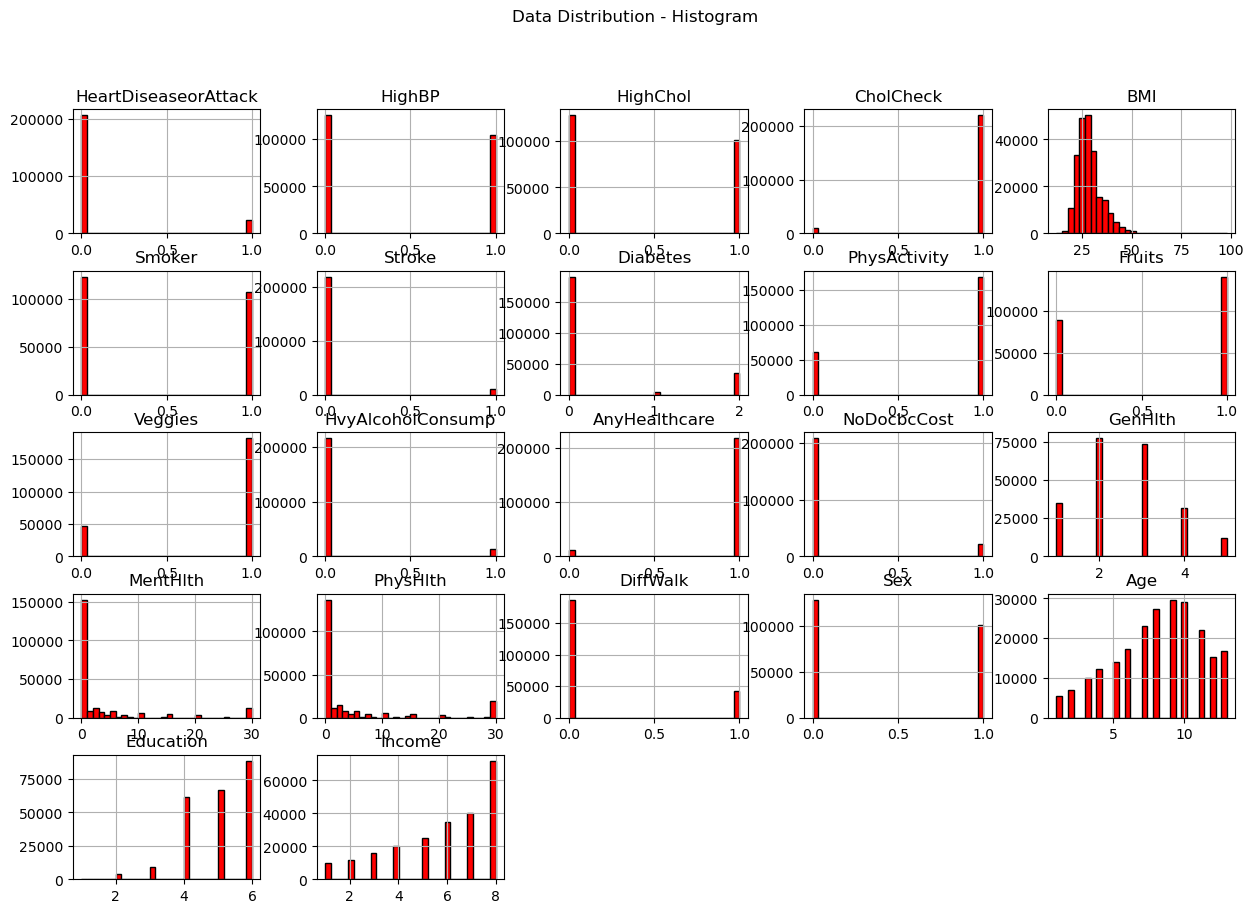

In [92]:
# Plot histograms for dataset
df.hist(bins=30, figsize=(15, 10), color='red', edgecolor='black') 
plt.suptitle('Data Distribution - Histogram')
plt.show()

## Univariate Analysis

## 1. HeartDiseaseorAttack

In [93]:
# Get summary statistics for heartdiseaseorattack
df['HeartDiseaseorAttack'].describe()

count    229762.000000
mean          0.103202
std           0.304224
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HeartDiseaseorAttack, dtype: float64

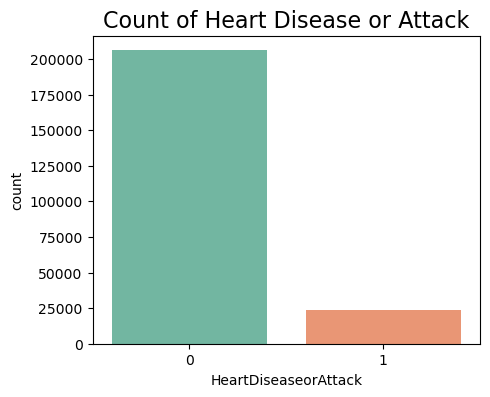

In [94]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, hue='HeartDiseaseorAttack', palette='Set2', legend=False)
plt.title('Count of Heart Disease or Attack', fontsize=16)
plt.show()

## 2. High BP

In [95]:
# Get summary statistics for HighBP
df['HighBP'].describe()

count    229762.000000
mean          0.454431
std           0.497920
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64

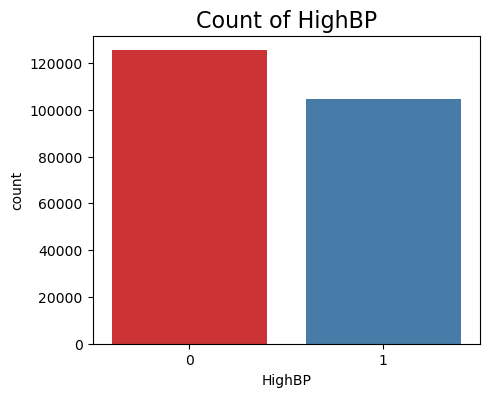

In [96]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HighBP', data=df, hue='HighBP', palette='Set1', legend=False)
plt.title('Count of HighBP', fontsize=16)
plt.show()

## 3. HightChol

In [97]:
# Get summary statistics for HighChol
df['HighChol'].describe()

count    229762.000000
mean          0.441753
std           0.496597
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64

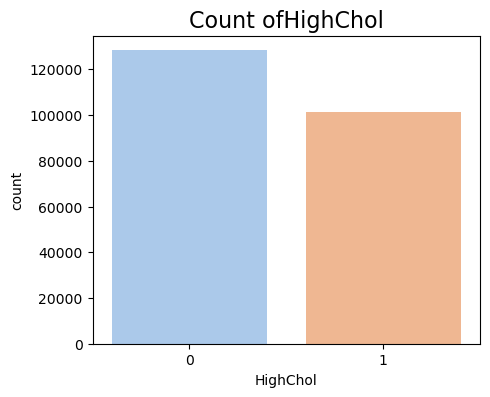

In [98]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HighChol', data=df, hue='HighChol', palette='pastel', legend=False)
plt.title('Count ofHighChol', fontsize=16)
plt.show()

## 4.CholCheck

In [99]:
# Get summary statistics for CholCheck
df['CholCheck'].describe()

count    229762.000000
mean          0.959532
std           0.197054
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64

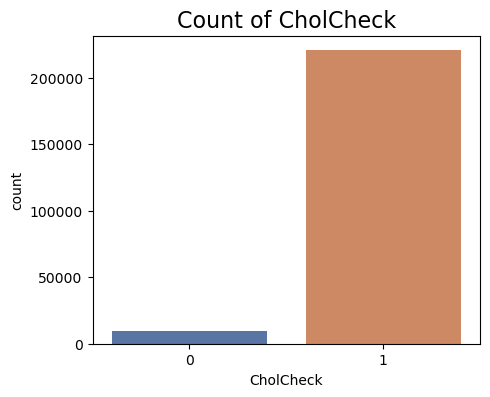

In [100]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='CholCheck', data=df, hue='CholCheck', palette='deep', legend=False)
plt.title('Count of CholCheck', fontsize=16)
plt.show()


## 5.BMI

In [101]:
# Get summary statistics for BMI
df['BMI'].describe()

count    229762.000000
mean         28.685818
std           6.786308
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64

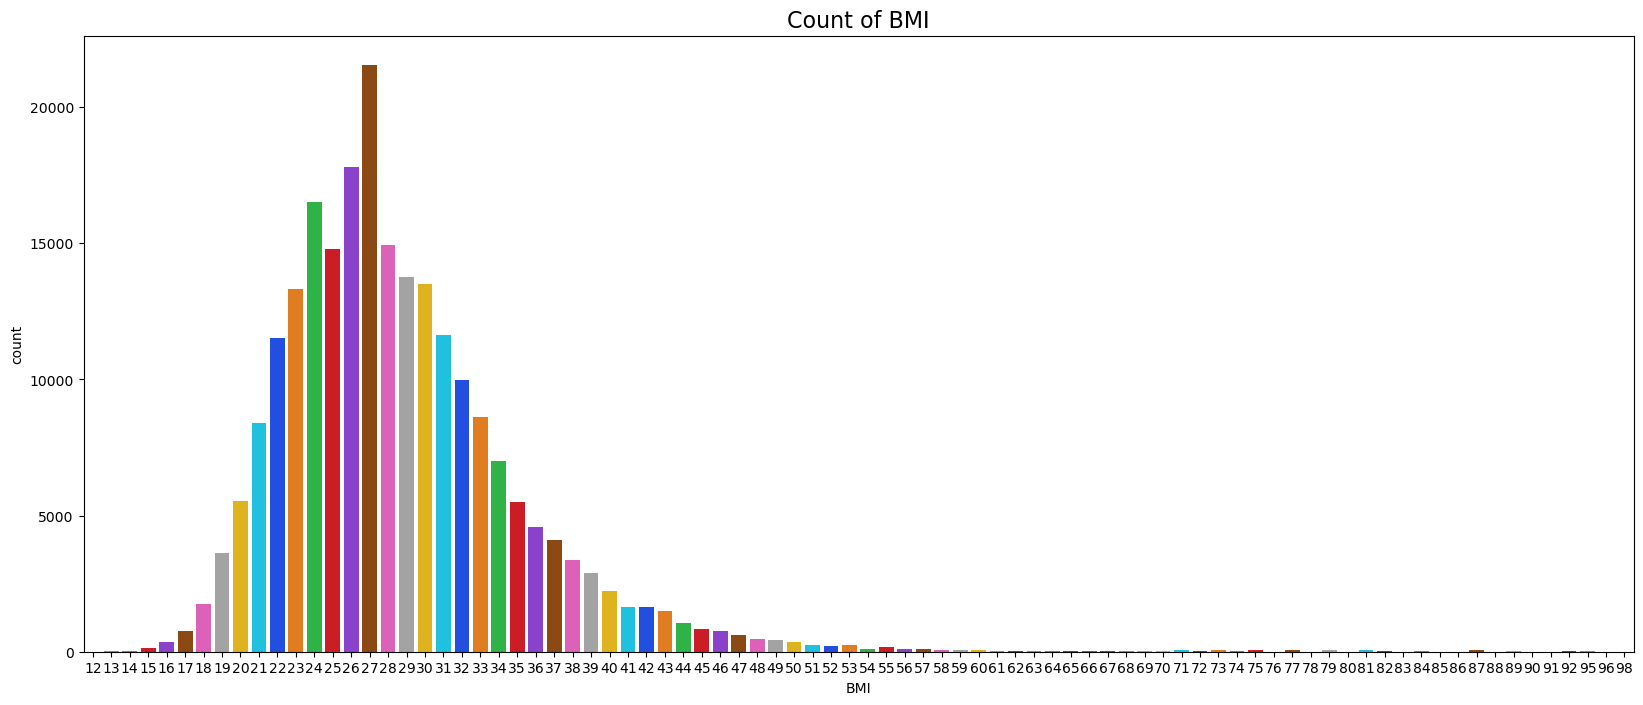

In [102]:
# Create the count plot 
plt.figure(figsize=(20, 8))
sns.countplot(x='BMI', data=df, hue='BMI', palette='bright', legend=False)
plt.title('Count of BMI', fontsize=16)
plt.show()

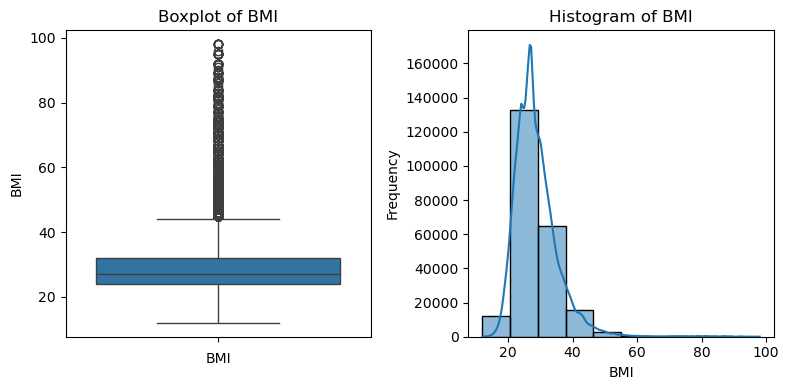

In [103]:
# Plotting for BMI
plt.figure(figsize=(8, 4))

# Box Plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')

# Histogram for BMI
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=10, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6.Smoker

In [104]:
# Get summary statistics for Smoker
df['Smoker'].describe()

count    229762.000000
mean          0.465682
std           0.498822
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Smoker, dtype: float64

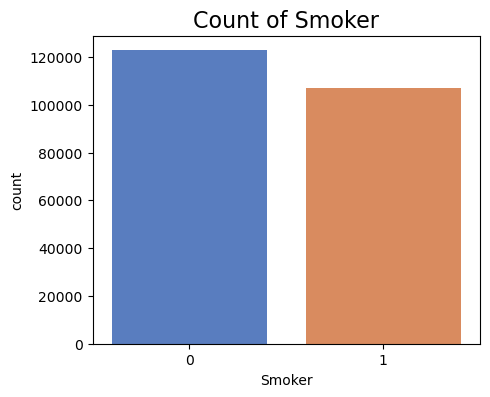

In [105]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Smoker', data=df, hue='Smoker', palette='muted', legend=False)
plt.title('Count of Smoker', fontsize=16)
plt.show()

## 7. Diabetes

In [106]:
# Get summary statistics for Diabetes
df['Diabetes'].describe()

count    229762.000000
mean          0.325611
std           0.724613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes, dtype: float64

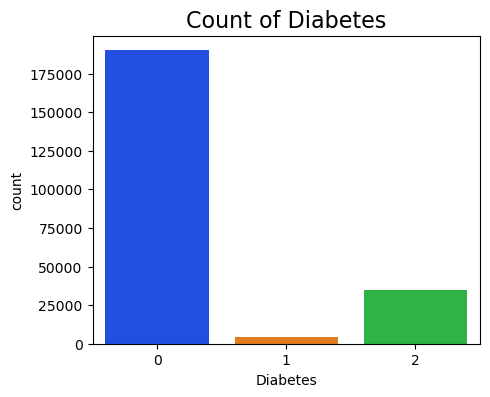

In [107]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Diabetes', data=df, hue='Diabetes', palette='bright', legend=False)
plt.title('Count of Diabetes', fontsize=16)
plt.show()

## 8. PhysActivity

In [108]:
# Get summary statistics for PhysActivity
df['PhysActivity'].describe()

count    229762.000000
mean          0.733389
std           0.442188
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysActivity, dtype: float64

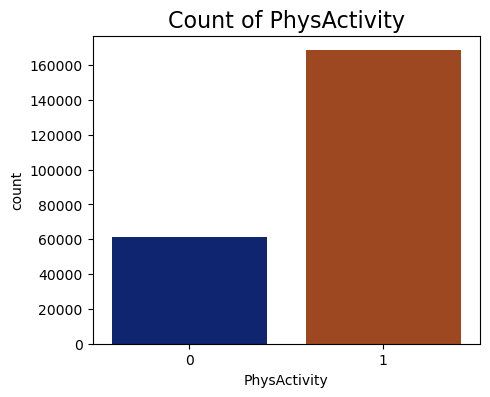

In [109]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='PhysActivity', data=df, hue='PhysActivity', palette='dark', legend=False)
plt.title('Count of PhysActivity', fontsize=16)
plt.show()

## 9. Fruits

In [110]:
# Get summary statistics for Fruits
df['Fruits'].describe()

count    229762.000000
mean          0.612973
std           0.487071
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Fruits, dtype: float64

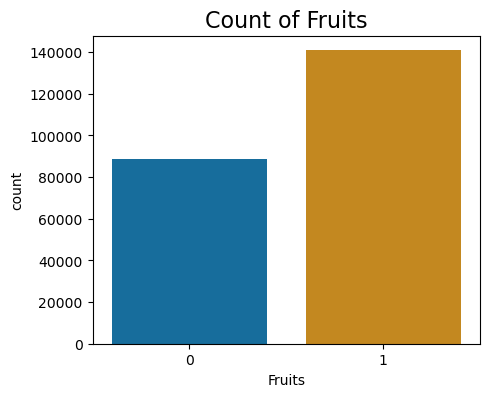

In [111]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Fruits', data=df, hue='Fruits', palette='colorblind', legend=False)
plt.title('Count of Fruits', fontsize=16)
plt.show()

## 10.Veggies

In [112]:
# Get summary statistics for Veggies
df['Veggies'].describe()

count    229762.000000
mean          0.794831
std           0.403826
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Veggies, dtype: float64

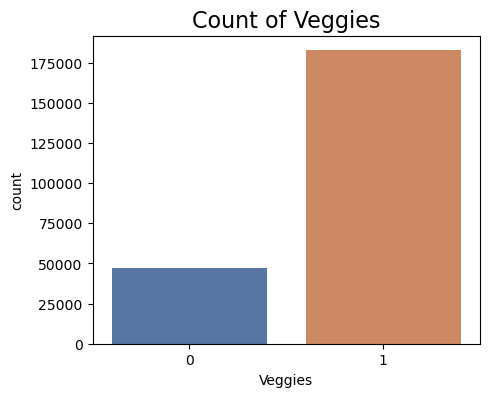

In [113]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Veggies', data=df, hue='Veggies', palette='deep', legend=False)
plt.title('Count of Veggies', fontsize=16)
plt.show()

## 11. HvyAlcoholConsump

In [114]:
# Get summary statistics for HvyAlcoholConsump
df['HvyAlcoholConsump'].describe()

count    229762.000000
mean          0.060715
std           0.238807
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HvyAlcoholConsump, dtype: float64

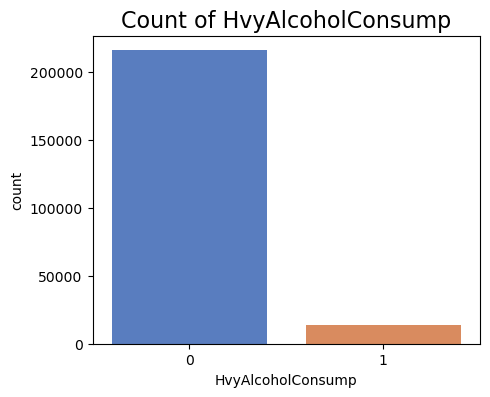

In [115]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HvyAlcoholConsump', data=df, hue='HvyAlcoholConsump', palette='muted', legend=False)
plt.title('Count of HvyAlcoholConsump', fontsize=16)
plt.show()

## 12. AnyHealthcare

In [116]:
# Get summary statistics for AnyHealthcare
df['AnyHealthcare'].describe()

count    229762.000000
mean          0.946070
std           0.225879
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: AnyHealthcare, dtype: float64

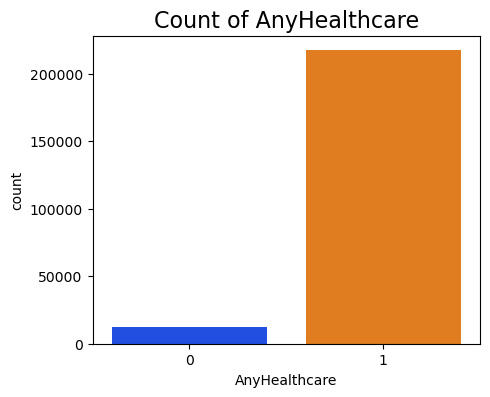

In [117]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='AnyHealthcare', data=df, hue='AnyHealthcare', palette='bright', legend=False)
plt.title('Count of AnyHealthcare', fontsize=16)
plt.show()

## 13. NoDocbcCost

In [118]:
# Get summary statistics for NoDocbcCost
df['NoDocbcCost'].describe()

count    229762.000000
mean          0.092796
std           0.290147
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NoDocbcCost, dtype: float64

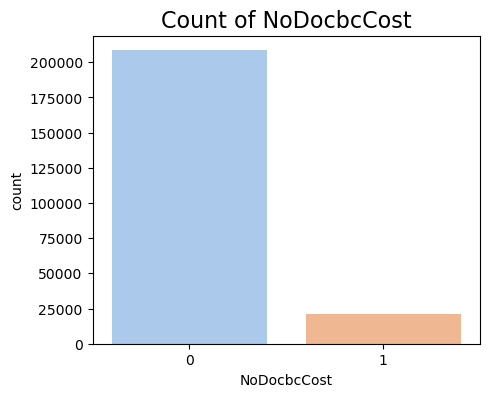

In [119]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='NoDocbcCost', data=df, hue='NoDocbcCost', palette='pastel', legend=False)
plt.title('Count of NoDocbcCost', fontsize=16)
plt.show()

## 14. GenHlth

In [120]:
# Get summary statistics for GenHlth
df['GenHlth'].describe()

count    229762.000000
mean          2.601144
std           1.064680
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64

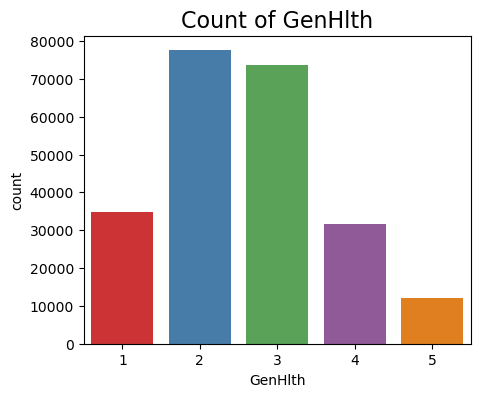

In [121]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='GenHlth', data=df, hue='GenHlth', palette='Set1', legend=False)
plt.title('Count of GenHlth', fontsize=16)
plt.show()

## 15. MentHlth

In [122]:
# Get summary statistics for MentHlth
df['MentHlth'].describe()

count    229762.000000
mean          3.505406
std           7.713722
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

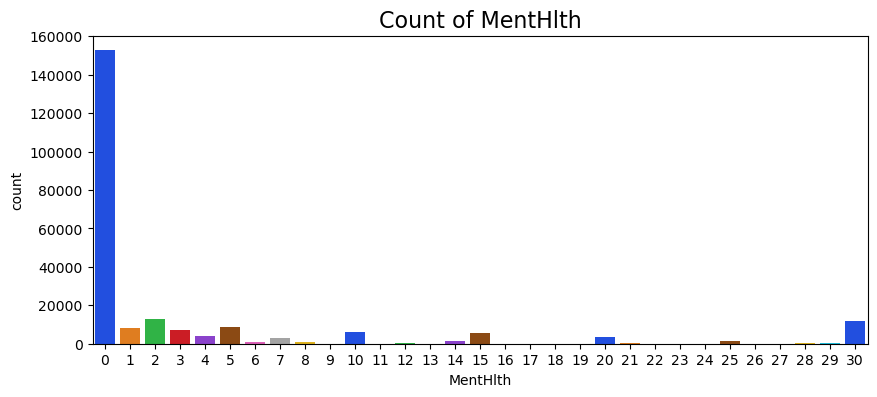

In [123]:
# Create the count plot 
plt.figure(figsize=(10, 4))
sns.countplot(x='MentHlth', data=df, hue='MentHlth', palette='bright', legend=False)
plt.title('Count of MentHlth', fontsize=16)
plt.show()

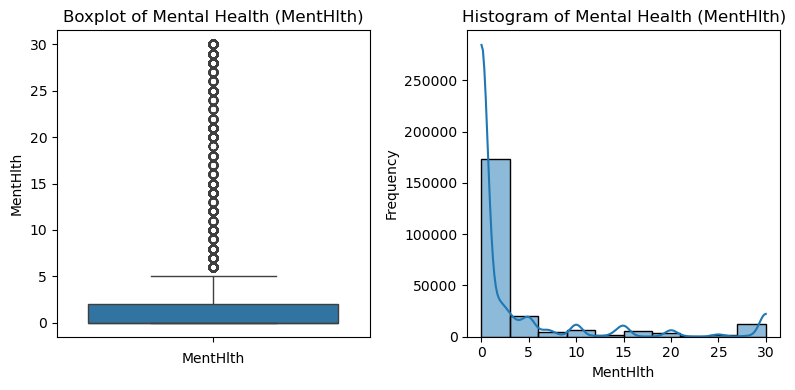

In [124]:
# Plotting for Mental Health (MentHlth)
plt.figure(figsize=(8, 4))

# Box Plot for MentHlth
plt.subplot(1, 2, 1)
sns.boxplot(y=df['MentHlth'])
plt.title('Boxplot of Mental Health (MentHlth)')
plt.xlabel('MentHlth')

# Histogram for MentHlth
plt.subplot(1, 2, 2)
sns.histplot(df['MentHlth'], bins=10, kde=True)
plt.title('Histogram of Mental Health (MentHlth)')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 16. PhysHlth

In [125]:
# Get summary statistics for PhysHlth
df['PhysHlth'].describe()

count    229762.000000
mean          4.675155
std           9.046547
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysHlth, dtype: float64

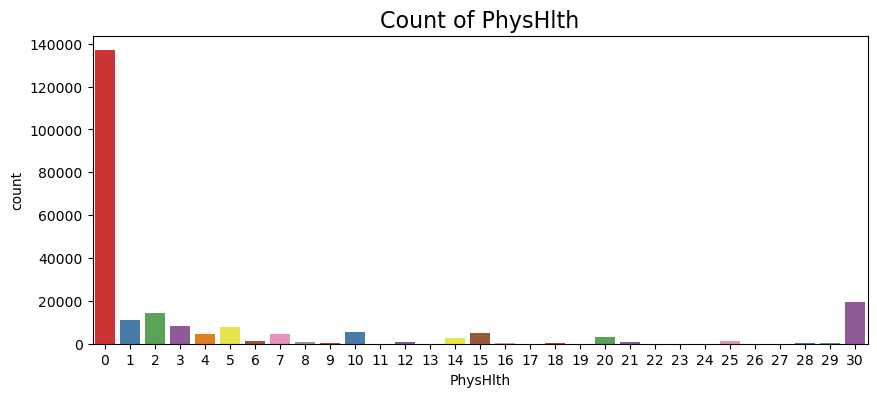

In [126]:
# Create the count plot 
plt.figure(figsize=(10, 4))
sns.countplot(x='PhysHlth', data=df, hue='PhysHlth', palette='Set1', legend=False)
plt.title('Count of PhysHlth', fontsize=16)
plt.show()

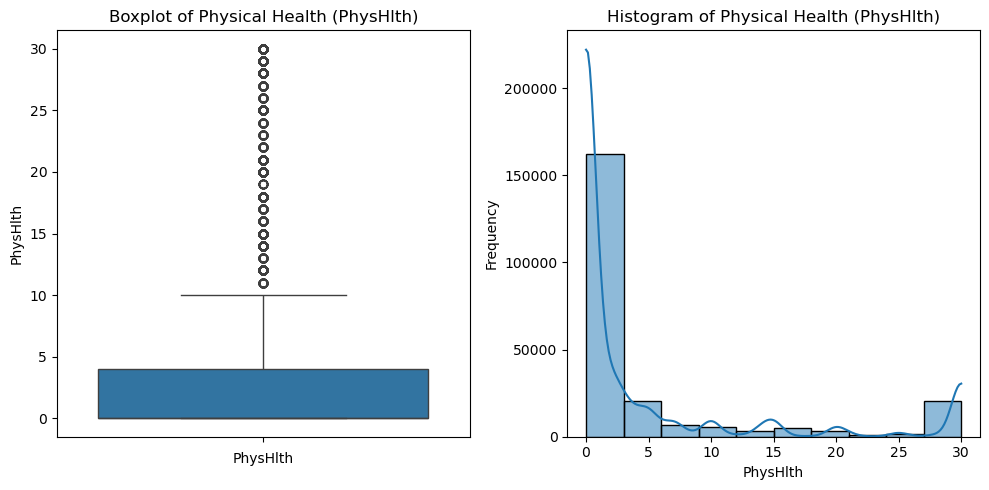

In [127]:
# Plotting for Physical Health (PhysHlth)
plt.figure(figsize=(10, 5))

# Box Plot for PhysHlth
plt.subplot(1, 2, 1)
sns.boxplot(y=df['PhysHlth'])
plt.title('Boxplot of Physical Health (PhysHlth)')
plt.xlabel('PhysHlth')

# Histogram for PhysHlth
plt.subplot(1, 2, 2)
sns.histplot(df['PhysHlth'], bins=10, kde=True)
plt.title('Histogram of Physical Health (PhysHlth)')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 17. DiffWalk

In [128]:
# Get summary statistics for DiffWalk
df['DiffWalk'].describe()

count    229762.000000
mean          0.185505
std           0.388708
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DiffWalk, dtype: float64

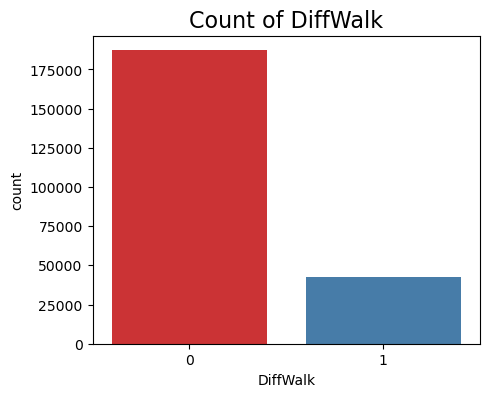

In [129]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='DiffWalk', data=df, hue='DiffWalk', palette='Set1', legend=False)
plt.title('Count of DiffWalk', fontsize=16)
plt.show()

## 18. Sex

In [130]:
# Get summary statistics for sex
df['Sex'].describe()

count    229762.000000
mean          0.439237
std           0.496295
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sex, dtype: float64

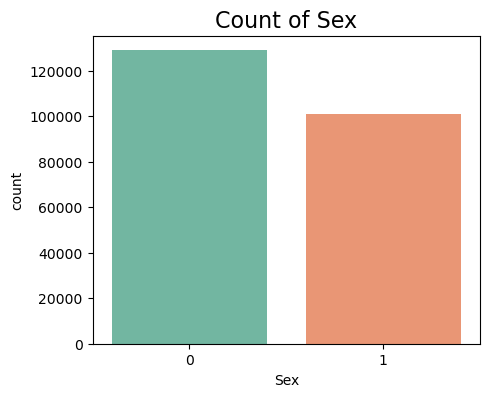

In [131]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Sex', data=df, hue='Sex', palette='Set2', legend=False)
plt.title('Count of Sex', fontsize=16)
plt.show()

## 19. Age

In [132]:
# Get summary statistics for Age
df['Age'].describe()

count    229762.000000
mean          8.086672
std           3.093792
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64

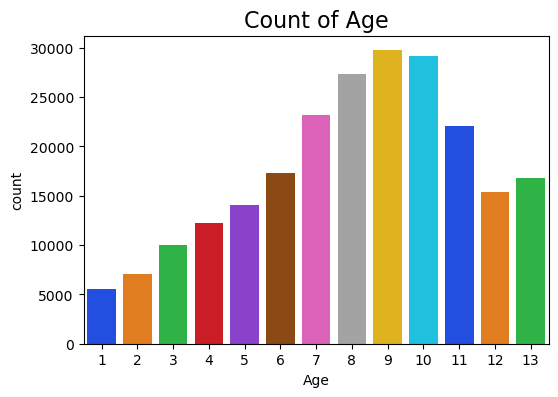

In [133]:
# Create the count plot 
plt.figure(figsize=(6, 4))
sns.countplot(x='Age', data=df, hue='Age', palette='bright', legend=False)
plt.title('Count of Age', fontsize=16)
plt.show()

## 20. Education

In [134]:
# Get summary statistics for Education
df['Education'].describe()

count    229762.000000
mean          4.980593
std           0.992835
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64

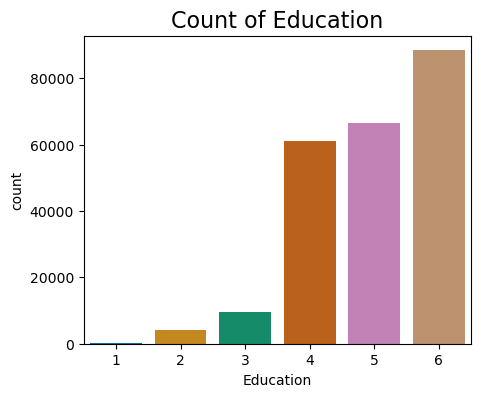

In [135]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Education', data=df, hue='Education', palette='colorblind', legend=False)
plt.title('Count of Education', fontsize=16)
plt.show()

## 21. Income

In [136]:
# Get summary statistics for Income
df['Income'].describe()

count    229762.000000
mean          5.890565
std           2.092372
min           1.000000
25%           5.000000
50%           6.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64

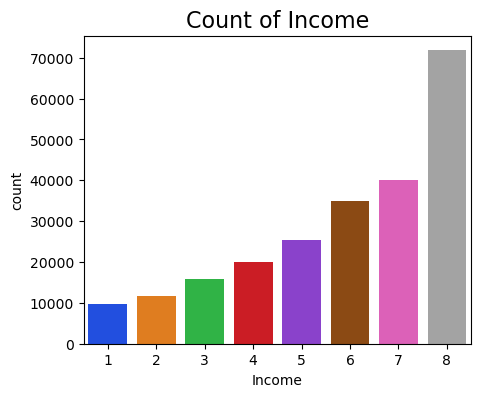

In [137]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Income', data=df, hue='Income', palette='bright', legend=False)
plt.title('Count of Income', fontsize=16)
plt.show()

## 22. stroke

In [138]:
# Get summary statistics for stroke
df['Stroke'].describe()

count    229762.000000
mean          0.044755
std           0.206766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Stroke, dtype: float64

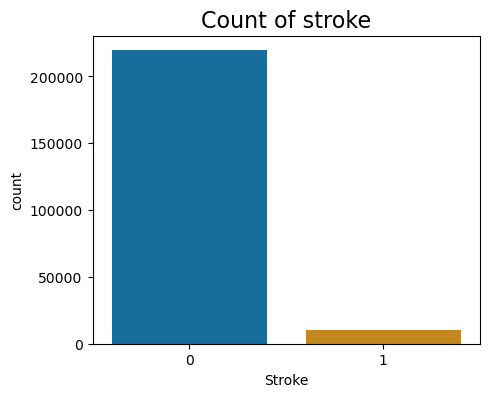

In [139]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Stroke', data=df, hue='Stroke', palette='colorblind', legend=False)
plt.title('Count of stroke', fontsize=16)
plt.show()

## Bivariate Analysis

## 1.Heartdisease and highchol

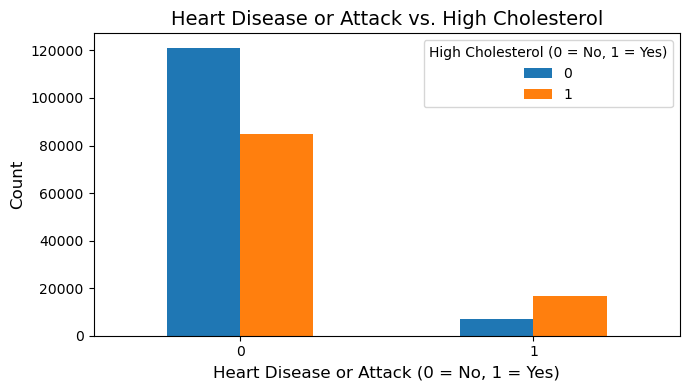

In [140]:
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HighChol'])

# Create the bar plot
ax = CrosstabResult.plot.bar(figsize=(7, 4), rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. High Cholesterol', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# legend title
plt.legend(title='High Cholesterol (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 2.Heartdisease and highBP

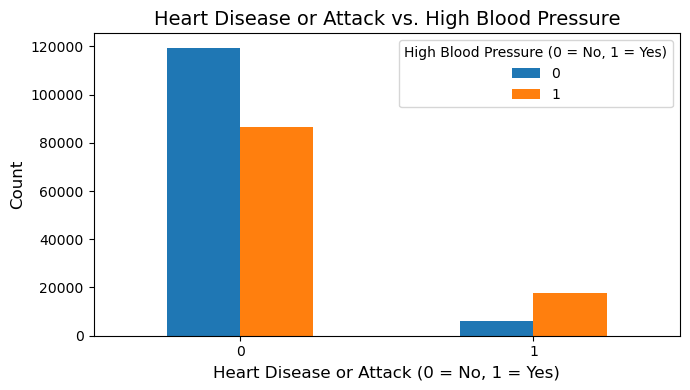

In [141]:
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HighBP'])

# Create the bar plot
ax = CrosstabResult.plot.bar(figsize=(7, 4), rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. High Blood Pressure', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# legend title
plt.legend(title='High Blood Pressure (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 3. Heart Disease and Physical Activity

<Figure size 700x400 with 0 Axes>

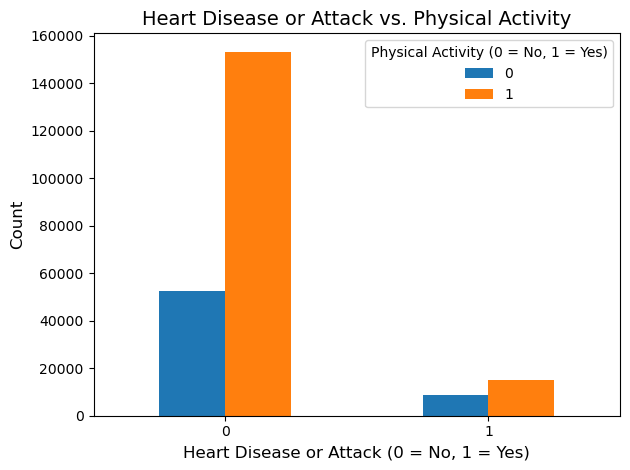

In [142]:
# Create the crosstab for HeartDiseaseorAttack and PhysActivity
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['PhysActivity'])

# Create the bar plot
plt.figure(figsize=(7, 4))
ax = CrosstabResult.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Physical Activity', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# legend title
plt.legend(title='Physical Activity (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout() 
plt.show()

## 4. Heart Disease and Smoker

<Figure size 700x400 with 0 Axes>

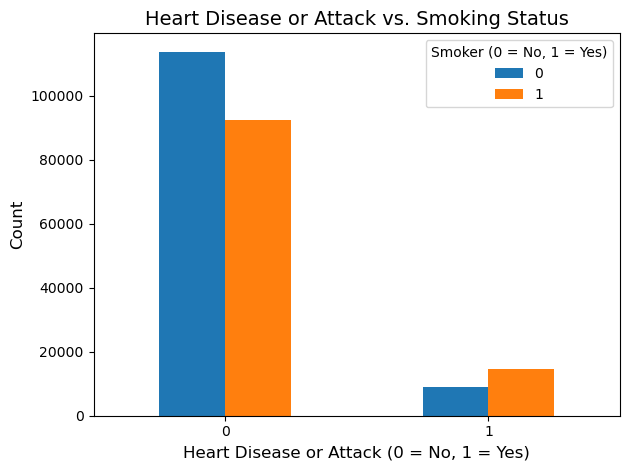

In [143]:
# Create the crosstab for HeartDiseaseorAttack and Smoker
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Smoker'])

# Create the bar plot
plt.figure(figsize=(7, 4))
ax = CrosstabResult.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Smoking Status', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# legend title
plt.legend(title='Smoker (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 5. Heart Disease and Age

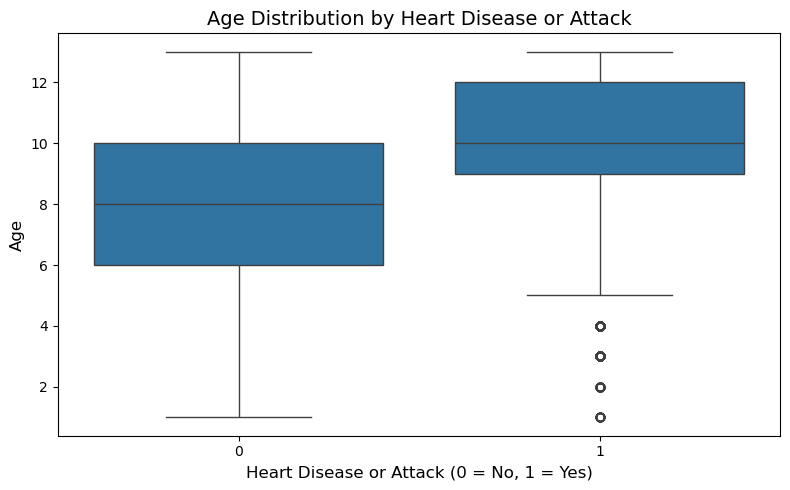

In [144]:
# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='HeartDiseaseorAttack', y='Age', data=df)

# Add title and axes labels
plt.title('Age Distribution by Heart Disease or Attack', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.tight_layout() 
plt.show()

## 6. Heart Disease and Sex

<Figure size 1000x400 with 0 Axes>

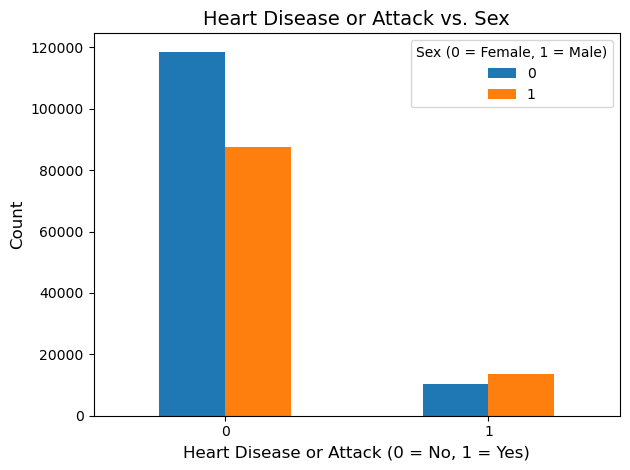

In [145]:
# Create a crosstab for HeartDiseaseorAttack and Sex
CrosstabSex = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Sex'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabSex.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Sex', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Sex (0 = Female, 1 = Male)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 7. Heart Disease and Heavy Alcohol Consumption

<Figure size 1000x400 with 0 Axes>

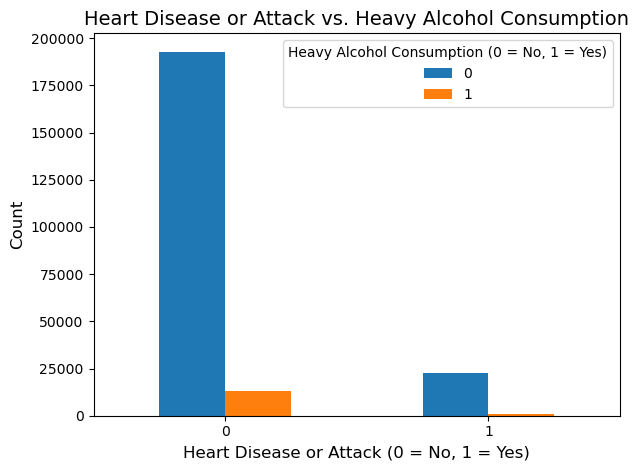

In [146]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HvyAlcoholConsump'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Heavy Alcohol Consumption', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Heavy Alcohol Consumption (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 8. Heart Disease and Income

<Figure size 1000x400 with 0 Axes>

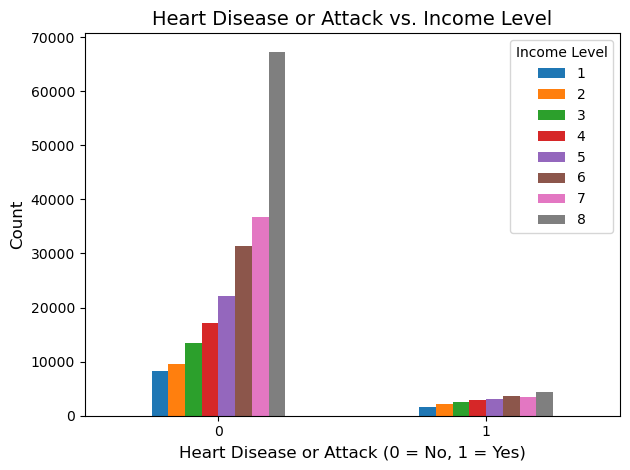

In [147]:
# Create the crosstab for HeartDiseaseorAttack and Income
CrosstabIncome = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Income'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabIncome.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Income Level', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Income Level', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 9. Heart Disease and Education

<Figure size 1000x400 with 0 Axes>

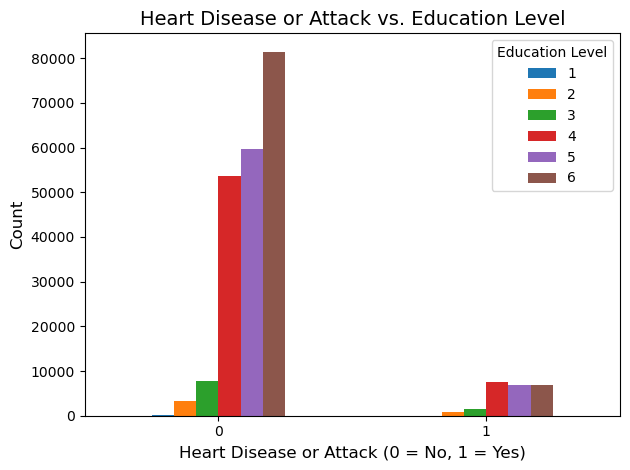

In [148]:
# Create the crosstab for HeartDiseaseorAttack and Education
CrosstabEducation = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Education'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabEducation.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Education Level', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Education Level', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 11. Heart Disease and Anyhealthcare

<Figure size 1000x400 with 0 Axes>

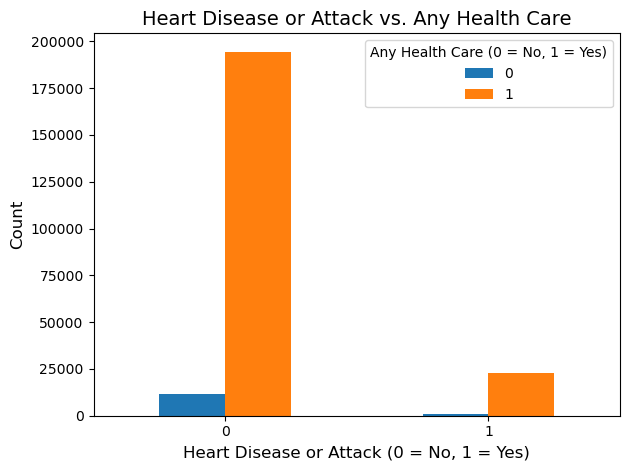

In [149]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['AnyHealthcare'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Any Health Care', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Any Health Care (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 12. Heart Disease and No doctor because of cost

<Figure size 1000x400 with 0 Axes>

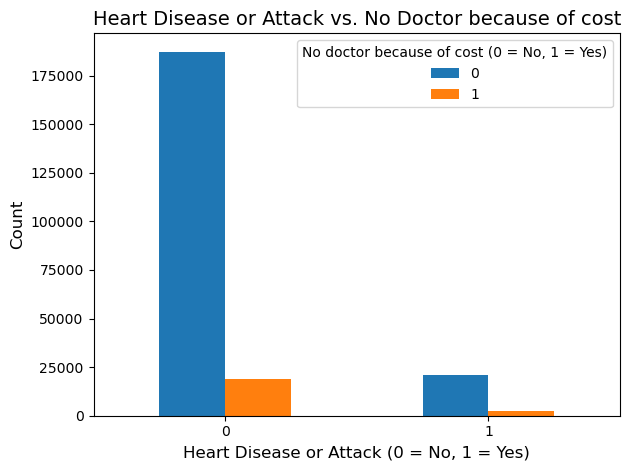

In [150]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['NoDocbcCost'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. No Doctor because of cost', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='No doctor because of cost (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 13. Heart Disease and Cholestrol Check

<Figure size 1000x400 with 0 Axes>

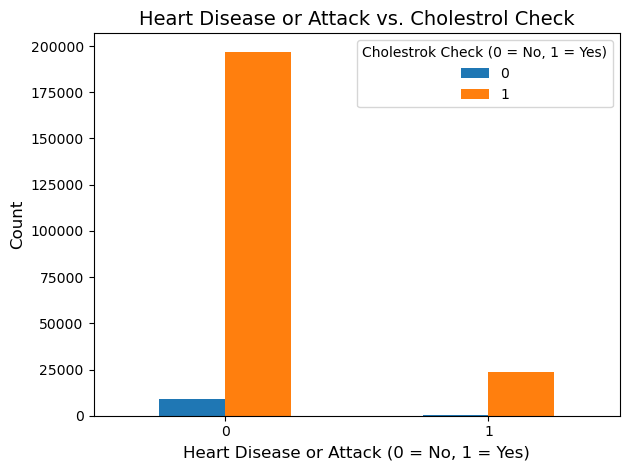

In [151]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['CholCheck'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Cholestrol Check', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Cholestrok Check (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 14. Heart Disease and Veggies

<Figure size 1000x400 with 0 Axes>

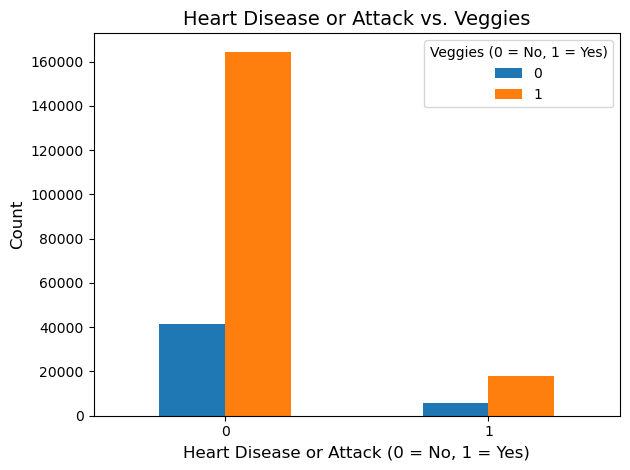

In [152]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Veggies'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Veggies', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Veggies (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## HeartAttack and Fruits

<Figure size 1000x400 with 0 Axes>

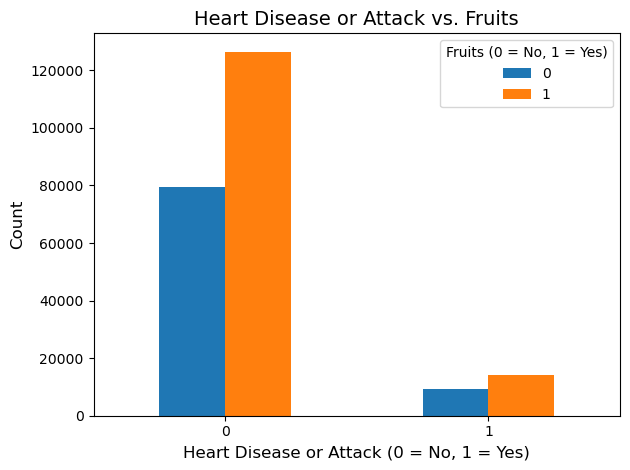

In [153]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Fruits'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Fruits', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Fruits (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## Multivariate Analysis

## 1. Heart Disease , High BP and High Cholestrol

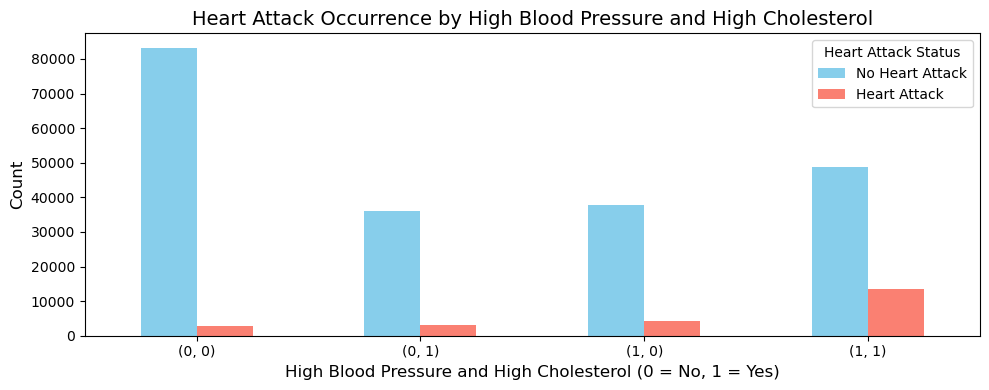

In [154]:
# Filter relevant columns and group data
df_filtered = df[['HeartDiseaseorAttack', 'HighBP', 'HighChol']]
grouped_data = df_filtered.groupby(['HeartDiseaseorAttack', 'HighBP', 'HighChol']).size().reset_index(name='Count')

# Pivot data to create a column chart format
pivot_data = grouped_data.pivot_table(
    index=['HighBP', 'HighChol'],
    columns='HeartDiseaseorAttack',
    values='Count'
).fillna(0)

# Rename columns for clarity
pivot_data.columns = ['No Heart Attack', 'Heart Attack']

# Plot the data as a bar plot
pivot_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 4))

# Add titles and labels
plt.title("Heart Attack Occurrence by High Blood Pressure and High Cholesterol", fontsize=14)
plt.xlabel("High Blood Pressure and High Cholesterol (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Attack Status")

# Display plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Heart Disease , Income and High Education

<Figure size 1400x800 with 0 Axes>

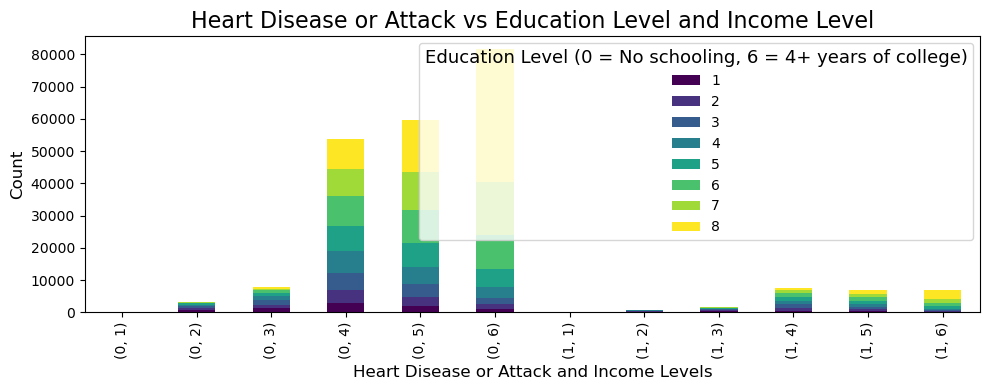

In [155]:
# Define labels for income levels
income_labels = [
    '1: Less than $10,000', '2: $10,000 to $15,000', 
    '3: $15,000 to $20,000', '4: $20,000 to $25,000', 
    '5: $25,000 to $35,000', '6: $35,000 to $50,000', 
    '7: $50,000 to $75,000', '8: $75,000 or more'
]

# Crosstab for Heart Disease, Education, and Income
crosstab_data = pd.crosstab(index=[df['HeartDiseaseorAttack'], df['Education']], columns=df['Income'])

# Plotting
plt.figure(figsize=(14, 8))
crosstab_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 4))

# Add titles and labels
plt.title('Heart Disease or Attack vs Education Level and Income Level', fontsize=16)
plt.xlabel('Heart Disease or Attack and Income Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Education Level (0 = No schooling, 6 = 4+ years of college)', title_fontsize='13', fontsize='10')

# Show plot
plt.tight_layout()
plt.show()

## Feature Engineering

## Create New Features

In [156]:
# # Create 'is_red_flag' column based on 'HighBP' and 'HighChol' columns
# df['is_red_flag'] = (df['HighBP'] == 1) & (df['HighChol'] == 1)

# # Create 'food' column based on 'Veggies' and 'Fruits' columns
# df['food'] = (df['Veggies'] == 1) & (df['Fruits'] == 1)

#### Comment:
- I created these features but these do not improve my model. So, I am going with my original fealtures.

In [157]:
# Map Diabetes to binary: 0 = no diabetes, 1 = any diabetes (combines values 1 and 2)
df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x > 0 else 0)

## Standardization

In [158]:
# Define numerical, ordinal, and categorical columns
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']  
categorical_features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                        'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',]  

# Ensure ordinal features are treated as integers
df[ordinal_features] = df[ordinal_features].astype(int)

# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for ordinal features
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('ord', ordinal_pipeline, ordinal_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(df)

# Get feature names
numerical_names = numerical_features
ordinal_names = ordinal_features
categorical_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

feature_names = numerical_names + ordinal_names + categorical_names

# Convert to DataFrame 
df = pd.DataFrame(X, columns=feature_names)

# Display transformed features
df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HeartDiseaseorAttack_1,HighBP_1,HighChol_1,...,Stroke_1,Diabetes_1,PhysActivity_1,Fruits_1,Veggies_1,HvyAlcoholConsump_1,AnyHealthcare_1,NoDocbcCost_1,DiffWalk_1,Sex_1
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


## Over Sampling

In [159]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HeartDiseaseorAttack_1'])
y = df['HeartDiseaseorAttack_1']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name=y.name)
resampled_df = pd.concat([X_resampled_df, y_resampled_series], axis=1)

## New Dataset info

In [160]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412100 entries, 0 to 412099
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BMI                     412100 non-null  float64
 1   MentHlth                412100 non-null  float64
 2   PhysHlth                412100 non-null  float64
 3   GenHlth                 412100 non-null  float64
 4   Education               412100 non-null  float64
 5   Income                  412100 non-null  float64
 6   Age                     412100 non-null  float64
 7   HighBP_1                412100 non-null  float64
 8   HighChol_1              412100 non-null  float64
 9   CholCheck_1             412100 non-null  float64
 10  Smoker_1                412100 non-null  float64
 11  Stroke_1                412100 non-null  float64
 12  Diabetes_1              412100 non-null  float64
 13  PhysActivity_1          412100 non-null  float64
 14  Fruits_1            

## Check for duplicates after Sampling

In [161]:
# Check for duplictes
duplicates = resampled_df[resampled_df.duplicated()]
duplicates

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBP_1,HighChol_1,CholCheck_1,...,Diabetes_1,PhysActivity_1,Fruits_1,Veggies_1,HvyAlcoholConsump_1,AnyHealthcare_1,NoDocbcCost_1,DiffWalk_1,Sex_1,HeartDiseaseorAttack_1
30186,-0.395771,-0.454439,-0.516790,1.0,5.0,7.0,10.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
35295,-0.395771,-0.454439,-0.516790,1.0,5.0,7.0,9.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
35694,0.046297,-0.454439,-0.516790,1.0,5.0,7.0,8.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
41459,0.635720,-0.454439,-0.074631,2.0,5.0,7.0,8.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
42976,0.488364,-0.454439,-0.516790,2.0,4.0,5.0,10.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340193,0.488364,-0.454439,-0.516790,1.0,5.0,7.0,8.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
382629,0.635720,-0.454439,-0.516790,2.0,3.0,7.0,8.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
387167,-0.543127,-0.454439,-0.516790,1.0,5.0,5.0,12.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
400397,-0.248415,-0.454439,-0.516790,1.0,5.0,7.0,12.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## Remove Duplicates after Sampling

In [162]:
# Drop the duplicates
resampled_df = resampled_df.drop_duplicates()

In [163]:
# Check agaim
duplicates = resampled_df[resampled_df.duplicated()]
duplicates

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBP_1,HighChol_1,CholCheck_1,...,Diabetes_1,PhysActivity_1,Fruits_1,Veggies_1,HvyAlcoholConsump_1,AnyHealthcare_1,NoDocbcCost_1,DiffWalk_1,Sex_1,HeartDiseaseorAttack_1


## Check the Imbalancing after Sampling

<Axes: xlabel='HeartDiseaseorAttack_1', ylabel='count'>

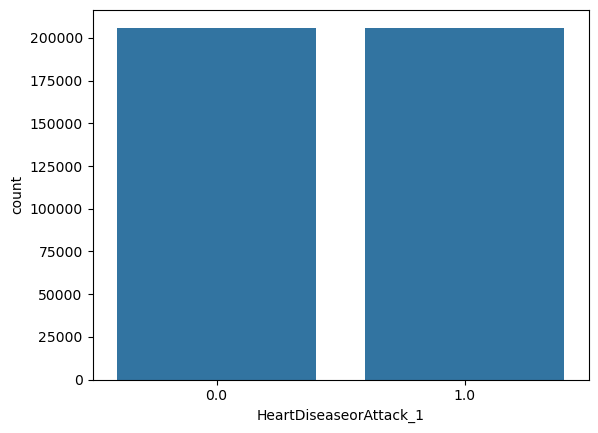

In [164]:
# Plot heartdiseaseorAttack to check imbalancing
sns.countplot(data=resampled_df,x='HeartDiseaseorAttack_1')

In [165]:
# Removing unnecessary columns
df=df.drop(columns=['HeartDiseaseorAttack_1','CholCheck_1','AnyHealthcare_1','HvyAlcoholConsump_1','NoDocbcCost_1'])

#### Comment:
- From Exploratory data analysis, remove the unnecessary columns 'Cholcheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'NoDocbcCost' those dont impact the target variable

## Save Preprocessed Data

In [ ]:
import os
# Create the data/processed directory if not exists
os.makedirs('../data/processed', exist_ok=True)

# Saving the Dataframe as a csv
df.to_csv('../data/processed/Heart_disease.csv', index=False) 